# [9660] Linear Regression 1

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 09/09/24 12:56:59


### Import libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt      # Alternative method

### Create data

In [ ]:
# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 X values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Array of y values

### Setup dataframe

In [ ]:
# Create pandas dataframe to store X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Display shape of dataframe
df.shape

(100, 2)

In [ ]:
# Display first five rows of dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


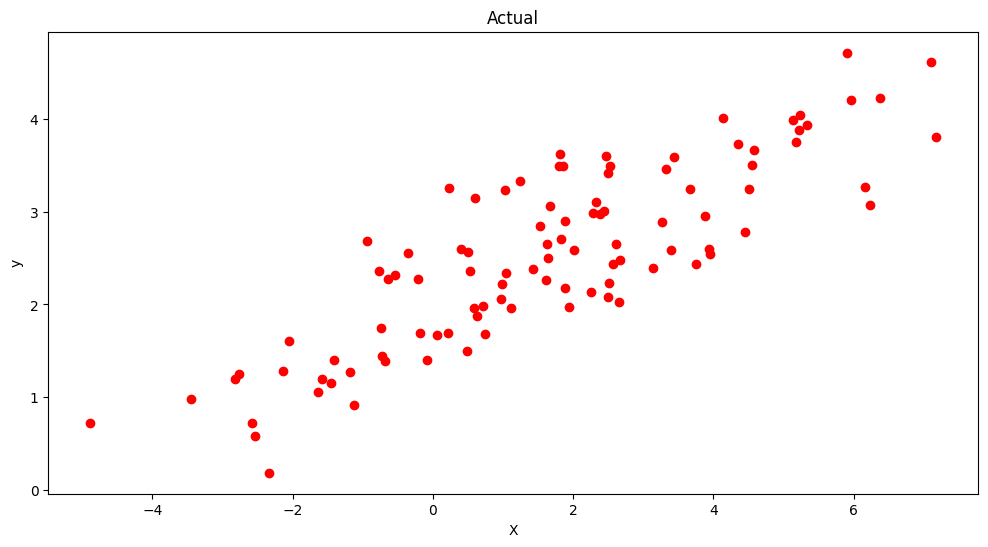

In [ ]:
# Plot actual data (X and y)
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

X is the independent variable  
y is the dependent variable

### Calculate linear regression - ordinary least squares

In [ ]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numerator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)     # covariance of X and y
df['xvar'] = (df['X'] - xmean)**2                       # variance of X

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)

print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763



xmean = np.mean(X)
ymean = np.mean(y)

This finds the average (mean) of the X values and the y values. These are needed to center the data around the means, which helps calculate the slope and intercept.


**Calculate Covariance and Variance:**

df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)  # Covariance of X and y

df['xvar'] = (df['X'] - xmean)**2                       # Variance of X

Covariance (xycov): This measures how much X and y change together. If they tend to increase or decrease together, the covariance will be positive.

Variance (xvar): This measures how much X varies or spreads out. Variance tells us how much the X values differ from their mean.

**Calculate Slope (β, Beta):**

beta = df['xycov'].sum() / df['xvar'].sum()

The slope (beta) is calculated by dividing the sum of the covariance by the sum of the variance. This gives us the rate of change of y with respect to X, or how much y changes for every unit increase in X.

**Calculate Intercept (α, Alpha):**

alpha = ymean - (beta * xmean)

The intercept (alpha) is calculated by subtracting the product of the slope (beta) and the mean of X from the mean of y. This gives the point where the line crosses the y-axis (when
𝑋
=
0
X=0).


𝑦
=
𝛼
+
𝛽
𝑋
y=α+βX.

In [ ]:
# Trained model
ypred = alpha + ( beta * X )

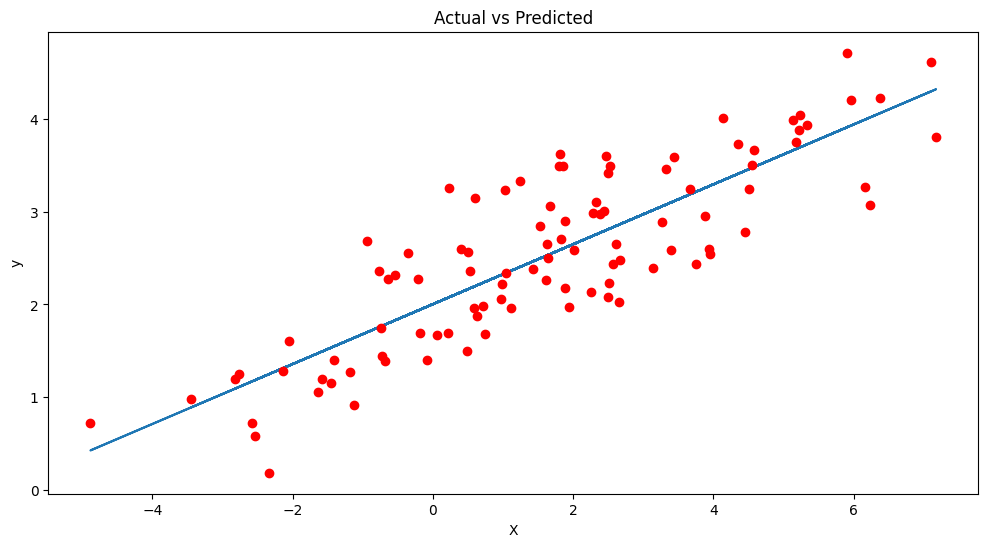

In [ ]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()